In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from data_processing import process_data

Creo la serie de tiempo para cada cajero.

In [2]:
#Escrea las primeras n+1 series de tiempo
process_data(n = 2)

Todos los archivos fueron guardados en la carpeta 'data_processed'.


<Figure size 1200x600 with 0 Axes>

Veamos algun ejemplo.

In [9]:
nro_cajero = 2
df = pd.read_csv(f'data_processed/df_resultado_cajero_{nro_cajero}.csv')

df['FECHA'] = pd.to_datetime(df['FECHA'])
df.head()

,FECHA,REMANENTE,DISPENSADO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA,INFLACION_MES_ANTERIOR,MEDIA_3_DIAS,MEDIA_7_DIAS,MEDIA_15_DIAS,MEDIA_30_DIAS,ES_DIA_IMPORTANTE,TARGET
0,2021-01-01,7954198,54977,1,0,0,0,0,0,0,2021,1,1,4.0,54977.000000,54977.000000,54977.000000,54977.000000,1,54977.0
1,2021-01-02,7950899,3298,0,0,1,0,0,0,0,2021,1,2,4.0,29137.500000,29137.500000,29137.500000,29137.500000,0,58275.0
2,2021-01-03,7895921,54977,0,0,0,1,0,0,0,2021,1,3,4.0,37750.666667,37750.666667,37750.666667,37750.666667,0,113252.0
3,2021-01-04,7525371,370550,0,1,0,0,0,0,0,2021,1,4,4.0,142941.666667,120950.500000,120950.500000,120950.500000,0,483802.0
4,2021-01-05,6540167,985203,0,0,0,0,0,1,0,2021,1,5,4.0,470243.333333,293801.000000,293801.000000,293801.000000,0,1469005.0


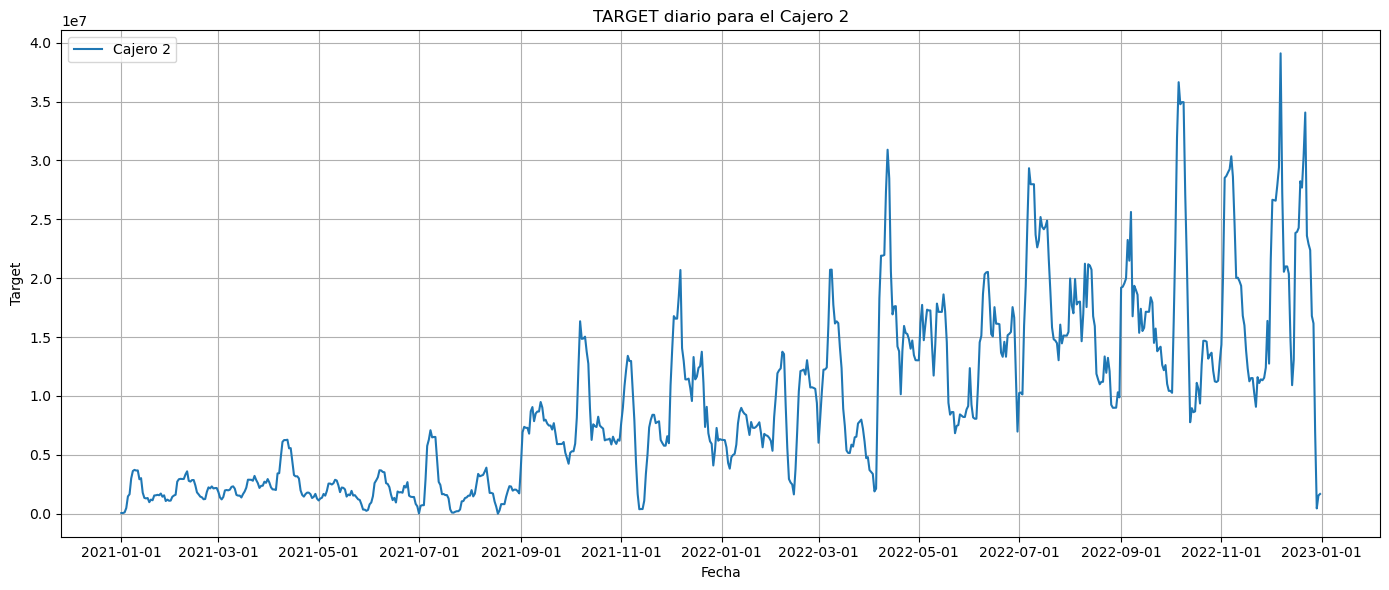

In [13]:
# Plotear
plt.figure(figsize=(14, 6))
plt.plot(df['FECHA'], df['TARGET'], label=f'Cajero {nro_cajero}')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'TARGET diario para el Cajero {nro_cajero}')
plt.xlabel('Fecha')
plt.ylabel('Target')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()